In [1]:
import os, sys    # for handling paths
import h5py as h5  #for handling data format
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
def restrict(df, col, lower_limit, upper_limit):
    mask = (df[col] >= lower_limit) & (df[col] <= upper_limit)
    return df[mask]

Checking the evolution of BSE_Detailed_Output_29 with a = 1.56, essentially merges on ZAMS 

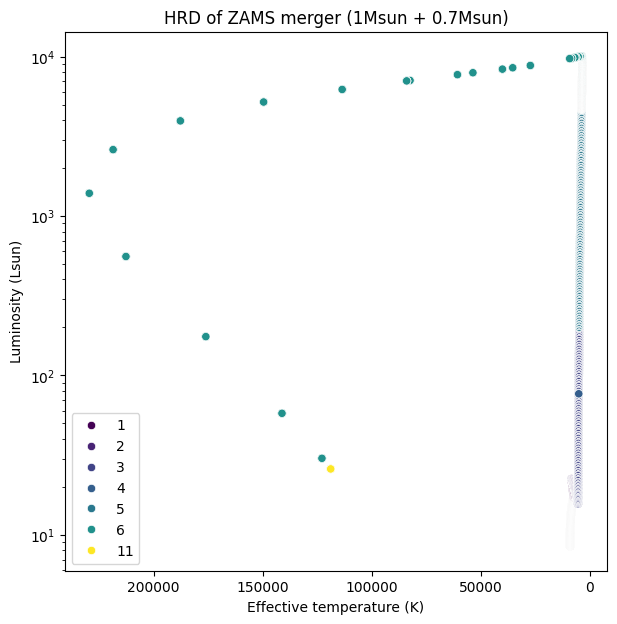

In [3]:
df = pd.read_csv('BSE_Detailed_Output_29.csv', sep = ',', header = 2)
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df, x='        Teff(1)         ', y='     Luminosity(1)      ', hue='Stellar_Type(1)', palette='viridis', legend='full')
#plt.xlim((5000,6500))
plt.gca().invert_xaxis()
plt.title('HRD of ZAMS merger (1Msun + 0.7Msun)')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()
#plt.ylim((6e-1,2e0))

Checking the evolution of the primary in BSE_Detailed_Output_50, which experiences stable mass transfer & donates mass to its companion, becomes a He WD 

Different to Z = 0.008, Z = 0.01
HRD looks fine, the binary merges on MS

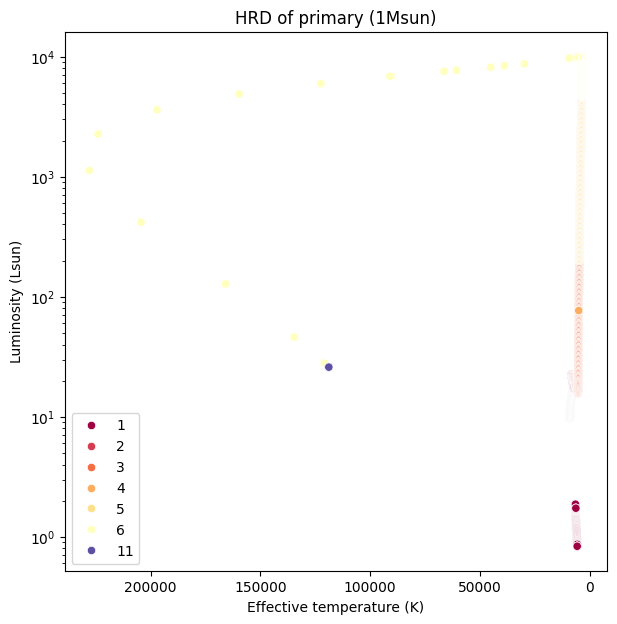

In [4]:
df = pd.read_csv('BSE_Detailed_Output_50.csv', sep = ',', header = 2)
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df, x='        Teff(1)         ', y='     Luminosity(1)      ', hue='Stellar_Type(1)', palette='Spectral', legend='full')
#plt.xlim((5000,6500))
plt.gca().invert_xaxis()
plt.title('HRD of primary (1Msun)')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()
#plt.ylim((6e-1,2e0))

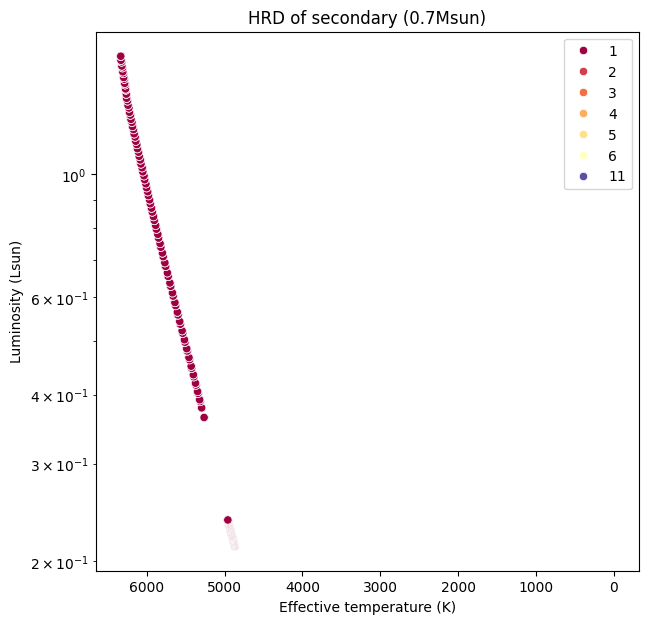

In [5]:
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df, x='        Teff(2)         ', y='     Luminosity(2)      ', hue='Stellar_Type(1)', palette='Spectral', legend='full')
plt.gca().invert_xaxis()
plt.title('HRD of secondary (0.7Msun)')
plt.xlabel('Effective temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.yscale('log')
plt.legend()

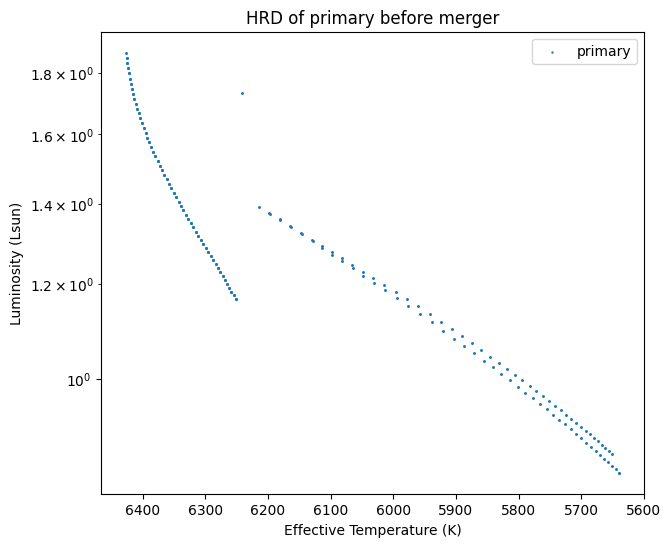

In [6]:
df1 = restrict(restrict(df, 'Stellar_Type(1)', 0, 1), 'Stellar_Type(2)', 0, 1) #MS stars only
plt.figure(figsize=(7,6))
plt.scatter(df1['        Teff(1)         '], df1['     Luminosity(1)      '], s = 0.5, label = 'primary')
plt.xlabel('Effective Temperature (K)')
plt.ylabel('Luminosity (Lsun)')
plt.gca().invert_xaxis()
plt.yscale('log')
plt.title('HRD of primary before merger')
plt.legend()

In [7]:
M1_init = 1 #Msun, primary
M2_init = 0.7 #Msun, secondary

In [9]:
ZAMS_merger_a = []
overcontact_a = []
MS_merger_a = []
beyond_MS_merger_a = []
no_merger_a = []
MS_MT_a = []
non_MS_MT_a = []
no_MT_a = []
MS_types = [0,1]

#SP = pd.read_csv(r'\\wsl.localhost\Ubuntu\home\minjih\2024\Honours\COMPAS\src\Z_0.004\BSE_System_Parameters.csv', sep = ',', header = 2)
SP = pd.read_csv(r'/home/minjihkim/COMPAS/src/COMPAS_Output/BSE_System_Parameters.csv', sep = ',', header = 2)


for n in range(0,100):
    df = pd.read_csv('BSE_Detailed_Output_'+str(n)+'.csv', sep = ',', header = 2)
    M1_0 = float(df['        Mass(1)         '][0])
    M2_0 = float(df['        Mass(2)         '][0])
    #a_0 = float(df['     SemiMajorAxis      '][0])
    a_0 = float(SP['   SemiMajorAxis@ZAMS   '][n])

    if M1_0 > M1_init: #chemically homogeneous evolution
        ZAMS_merger_a.append(a_0)
    elif M1_0 == M2_0 and M1_0 == (M1_init+M2_init)/2:
        overcontact_a.append(a_0)
    else:
        merged = False
        MT = False
        for i in range(df.shape[0]):
            type2 = int(df['Stellar_Type(2)'][i])
            type1 = int(df['Stellar_Type(1)'][i])
            if type2 == 15: #mass-less remnant
                if type1 in MS_types:
                    MS_merger_a.append(a_0)
                else:
                    beyond_MS_merger_a.append(a_0)
                merged = True
                break
            if not MT and int(df['MT_History'][i]): #if != 0, there was a mass transfer
                if type1 in MS_types:
                    MS_MT_a.append(a_0)
                else:
                    non_MS_MT_a.append(a_0)
                MT = True
        if not merged:
            no_merger_a.append(a_0)
        if not MT:
            no_MT_a.append(a_0)

MT_History:
- NO MASS TRANSFER = 0
- MASS TRANSFER STABLE STAR1 -> STAR2 = 1
- MASS TRANSFER STABLE STAR2 -> STAR1 = 2
- MASS TRANSFER COMMON ENVELOPE STAR1 -> STAR2 = 3
- MASS TRANSFER COMMON ENVELOPE STAR2 -> STAR1 = 4
- MASS TRANSFER COMMON ENVELOPE DOUBLE CORE = 5
- MASS TRANSFER -> MERGER = 6

Initial semi-major axis resolution:

From 0.00001 to 1 AU = 0.01 AU

From 1 AU to 10 AU = 1 AU

In [10]:
def AU_to_Rsol(a1_AU, a2_AU):
    a1_Rsol = round(a1_AU*214.9394693836, 4)
    a2_Rsol = round(a2_AU*214.9394693836, 4)
    return str(a1_Rsol) + " to " + str(a2_Rsol) + " Rsol"

In [11]:
lists = [ZAMS_merger_a, overcontact_a, MS_merger_a, beyond_MS_merger_a, MS_MT_a, non_MS_MT_a, no_merger_a, no_MT_a]
descriptions = ["ZAMS merger:", "Overcontact binaries at ZAMS:", "MS merger (excluding ZAMS merger and overcontact binaries):", 
                "Merger following Cases B and C:", "Mass transfer from MS donor:", "Mass transfer from non-MS donor:", "No merger throughout the evolution:", 
                "No mass transfer throughout the evolution:"]

print("Initial (i.e. ZAMS) semi-major axis for: ")
for i in range(len(lists)):
    if lists[i] != []:
        print(descriptions[i], lists[i][0], "to", lists[i][-1], "AU   or  ", AU_to_Rsol(lists[i][0], lists[i][-1]))

Initial (i.e. ZAMS) semi-major axis for: 
ZAMS merger: 1e-05 to 0.00726 AU   or   0.0021 to 1.5605 Rsol
Overcontact binaries at ZAMS: 0.00751 to 0.01026 AU   or   1.6142 to 2.2053 Rsol
MS merger (excluding ZAMS merger and overcontact binaries): 0.01051 to 0.01351 AU   or   2.259 to 2.9038 Rsol
Mass transfer from MS donor: 0.01051 to 0.02376 AU   or   2.259 to 5.107 Rsol
Mass transfer from non-MS donor: 0.02401 to 0.02476 AU   or   5.1607 to 5.3219 Rsol
No merger throughout the evolution: 0.01376 to 0.02476 AU   or   2.9576 to 5.3219 Rsol


Compared to Z = 0.008:

- overall similar
- ZAMS merger: upper limit 0.05 Rsol higher
- Overcontact binaries at ZAMS: lower limit 0.05 Rsol higher, upper limit same
- MS merger: lower limit same, upper limit 1.4 Rsol smaller
- Mass transfer from MS donor: lower limit same, upper limit 0.6 Rsol higher
- Mass transfer from non-MS donor: lower limit 0.6 Rsol higher, upper limit same
- No merger throughout the evolution: lower limit 0.3 Rsol higher, upper limit same

Overall, looks reasonable, seems to work.